In [38]:
import arviz as az

Running on PyMC v5.10.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y_sigma, Intercept, x]


Sampling 2 chains for 5_000 tune and 1_000 draw iterations (10_000 + 2_000 draws total) took 48 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


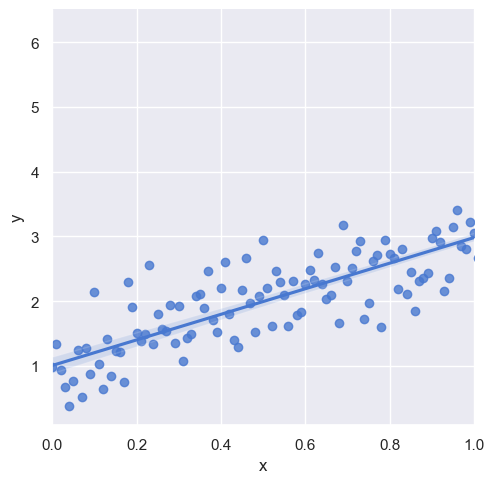

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import bambi as bmb  # conda install bambi -c conda-forge

sns.set(style="darkgrid", palette="muted")

def simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq):
    """
    Simulate a random dataset using a noisy
    linear process.
    N: Number of data points to simulate
    beta_0: Intercept
    beta_1: Slope of univariate predictor, X
    """
    # Create a pandas DataFrame with column ’x’ containing
    # N uniformly sampled values between 0.0 and 1.0

    df = pd.DataFrame(
        {"x":
            np.random.RandomState(42).choice(
                list(map(
                    lambda x: float(x)/100.0,
                    np.arange(N)
                )), N, replace=False
            )
        }
    )
    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to
    # generate a column ’y’ of responses based on ’x’
    eps_mean = 0.0
    df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(42).normal(
        eps_mean, eps_sigma_sq, N
    )
    return df

def glm_mcmc_inference(df, iterations=5000):
    """
    Calculates the Markov Chain Monte Carlo trace of
    a Generalised Linear Model Bayesian linear regression
    model on supplied data.
    df: DataFrame containing the data
    iterations: Number of iterations to carry out MCMC for
    """
    # Use pymc to construct a model context
    # basic_model = pm.Model()
    # with basic_model:
    #     # Create the glm using the Patsy model syntax
    #     # We use a Normal distribution for the likelihood
    #     pm.glm.glm("y ~ x", df, family=pm.glm.families.Normal())
    #     #bm.
    #     # Use Maximum A Posteriori (MAP) optimisation
    #     # as initial value for MCMC
    #     start = pm.find_MAP()
    #     # Use the No-U-Turn Sampler
    #     step = pm.NUTS()
    #     # Calculate the trace
    #     trace = pm.sample(
    #         iterations, step, start,
    #         random_seed=42, progressbar=True
    #     )

    # model = bmb.Model("y ~ x", df)
    # trace = model.fit(draws=3000)

    # Use Bambi to construct a model context
    model = bmb.Model("y ~ x", df)
    # Define the formula for the model
    #formula = "y ~ x"
    # Add the formula to the model
    #model.add(formula)
    # Sample from the posterior distribution
    trace = model.fit(tune=iterations)
    return trace


if __name__ == "__main__":
    print(f"Running on PyMC v{pm.__version__}")
    # These are our "true" parameters
    beta_0 = 1.0 # Intercept
    beta_1 = 2.0 # Slope
    # Simulate 100 data points, with a variance of 0.5
    N = 200
    eps_sigma_sq = 0.5
    # Simulate the "linear" data using the above parameters
    df = simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq)
    # Plot the data, and a frequentist linear regression fit
    # using the seaborn package
    sns.lmplot(x="x", y="y", data=df)
    plt.xlim(0.0, 1.0)
    trace = glm_mcmc_inference(df, iterations=5000)
    # pm.plot_trace(trace[500:])
    # plt.show()
    # # Plot a sample of posterior regression lines
    # sns.lmplot(x="x", y="y", data=df, size=10, fit_reg=False)
    # plt.xlim(0.0, 1.0)
    # plt.ylim(0.0, 4.0)
    # pm.glm.plot_posterior_predictive(trace, samples=100)
    # x = np.linspace(0, 1, N)
    # y = beta_0 + beta_1*x
    # plt.plot(x, y, label="True Regression Line", lw=3., c="green")
    # plt.legend(loc=0)
    # plt.show()


In [75]:
import xarray as xr

In [94]:
x = np.linspace(0, 1, 200)
print(x)

[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.42713568 0.4321608  0.43718593 0.44221106 0.447236

In [85]:
print(trace.posterior)

<xarray.Dataset> Size: 3MB
Dimensions:    (chain: 2, draw: 1000, dim_0: 200)
Coordinates:
  * chain      (chain) int32 8B 0 1
  * draw       (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Dimensions without coordinates: dim_0
Data variables:
    Intercept  (chain, draw) float64 16kB 1.028 0.997 1.075 ... 0.8837 1.051
    x          (chain, draw) float64 16kB 1.972 1.98 1.901 ... 1.887 2.115 1.925
    y_sigma    (chain, draw) float64 16kB 0.4409 0.49 0.4589 ... 0.495 0.4587
    y_model    (chain, draw, dim_0) float64 3MB 1.028 1.048 ... 4.863 4.882
Attributes:
    created_at:                  2024-02-20T17:31:11.313365
    arviz_version:               0.17.0
    inference_library:           pymc
    inference_library_version:   5.10.4
    sampling_time:               47.820749282836914
    tuning_steps:                5000
    modeling_interface:          bambi
    modeling_interface_version:  0.13.0


c:\Users\Nick\anaconda3\envs\pymc_env_0\Lib\site-packages\arviz\plots\lmplot.py:211: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)


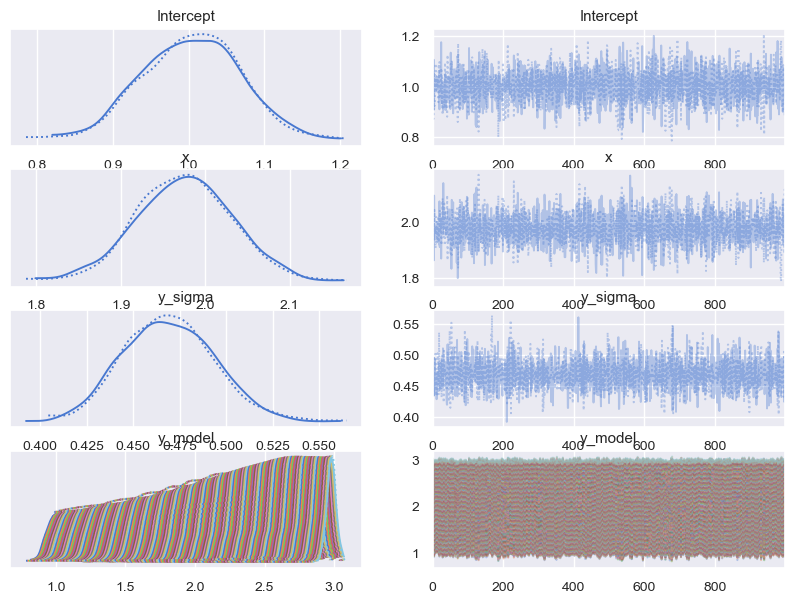

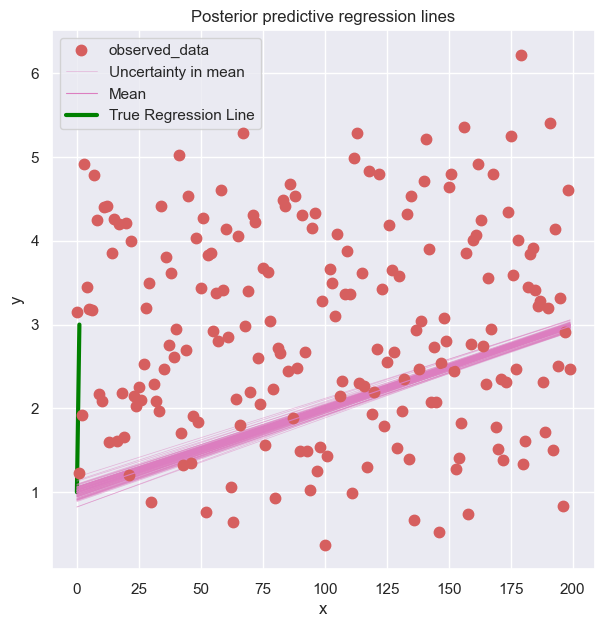

In [95]:
#pm.plot_trace(trace)
#plt.show()

trace.posterior["y_model"] = trace.posterior["Intercept"] + trace.posterior["x"] * xr.DataArray(x)
az.plot_trace(trace, figsize=(10, 7));
# Plot a sample of posterior regression lines
#sns.lmplot(x="x", y="y", data=df, fit_reg=False)
#plt.xlim(0.0, 1.0)
#plt.ylim(0.0, 4.0)
# pm.glm.plot_posterior_predictive(trace, samples=100)
#az.plot_lm(idata=trace, y="y", x="x", y_model="y_model")
#az.plot_hdi(x = "x", y=trace.posterior["y_sigma"])

_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=trace, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

x = np.linspace(0, 1, N)
y = beta_0 + beta_1*x
plt.plot(x, y, label="True Regression Line", lw=3., c="green")
plt.legend(loc=0)
plt.show()